<a href="https://colab.research.google.com/github/ZohebAbai/Deep-Learning-Projects/blob/master/Online_Challenges_Hackathons/Synapse%20Dreams/Malaria_challenge_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries and Dataset

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
!cp -r 'drive/My Drive/Malaria' 'data/'

In [0]:
train_data = pd.read_csv('data/SubCh2_TrainingData.csv')
train_data.head()

,Sample_Names,Country,Asexual.stage..hpi.,Kmeans.Grp,PF3D7_0100100,PF3D7_0100200,PF3D7_0100300,PF3D7_0100600,PF3D7_0100800,PF3D7_0101300,PF3D7_0101600,PF3D7_0101800,PF3D7_0101900,PF3D7_0102000,PF3D7_0102100,PF3D7_0102200,PF3D7_0102300,PF3D7_0102400,PF3D7_0102500,PF3D7_0102600,PF3D7_0102700,PF3D7_0102800,PF3D7_0102900,PF3D7_0103100,PF3D7_0103200,PF3D7_0103300,PF3D7_0103400,PF3D7_0103500,PF3D7_0103600,PF3D7_0103700,PF3D7_0103800,PF3D7_0103900,PF3D7_0104000,PF3D7_0104100,PF3D7_0104200,PF3D7_0104300,PF3D7_0104400,PF3D7_0104500,PF3D7_0104600,PF3D7_0104700,...,PF3D7_1475500,PF3D7_1475600,PF3D7_1475700,PF3D7_1475800,PF3D7_1475900,PF3D7_1476000,PF3D7_1476100,PF3D7_1476200,PF3D7_1476300,PF3D7_1476400,PF3D7_1476500,PF3D7_1476600,PF3D7_1476700,PF3D7_1476800,PF3D7_1476900,PF3D7_1477000,PF3D7_1477200,PF3D7_1477300,PF3D7_1477500,PF3D7_1477600,PF3D7_1477700,PF3D7_1477800,PF3D7_1477900,PF3D7_1478000,PF3D7_1478100,PF3D7_1478200,PF3D7_1478300,PF3D7_1478400,PF3D7_1478500,PF3D7_1478600,PF3D7_1478800,PF3D7_1479000,PF3D7_1479200,PF3D7_1479400,PF3D7_1479500,PF3D7_1479600,PF3D7_1479900,PF3D7_1480000,PF3D7_1480100,ClearanceRate
0,GSM1427365,Bangladesh,20,B,0.226311,-0.396829,-1.804581,NaN,NaN,0.355761,-0.243680,-0.601083,1.655191,2.634036,0.092779,-1.454372,0.144790,-0.519450,-1.193274,1.012654,-1.100345,-0.267389,1.321010,-0.689946,-0.339872,0.580200,-0.350104,-0.414217,0.226567,-0.329003,-1.156083,-0.319572,-0.804892,-0.186247,-0.230964,-0.429403,0.027621,1.255509,-0.408523,0.686933,...,0.247639,0.414588,-0.609761,-0.029457,-0.341765,0.744489,0.683588,1.681466,-0.447226,2.514189,-0.845067,-0.729540,0.241480,-0.894407,-0.016350,0.091801,0.691426,0.021056,0.344804,0.427450,-1.113008,-1.454772,-0.243117,0.742657,-0.736678,-0.592210,0.921107,-1.053140,0.080438,0.999088,-0.669221,-0.333383,-0.778371,-1.227344,0.810284,2.883478,NaN,-1.309528,-0.641710,Fast
1,GSM1427366,Bangladesh,18,B,0.554427,0.542001,-1.561573,-0.490289,0.857929,0.239295,0.359973,1.053232,-0.416013,1.585960,0.346369,-1.364969,-0.243410,-0.156218,-0.917875,2.297384,-0.719756,0.169536,0.908592,-0.697186,-0.154184,0.095497,-0.094206,0.103970,0.358957,0.072616,-0.213666,-0.136453,1.470639,-0.271561,0.165538,-0.168662,-0.265535,0.659105,-0.618251,0.101328,...,0.641985,-0.041027,-0.042551,0.490422,0.122989,0.487192,0.524537,2.475554,0.034714,-0.249857,-0.612199,-0.602135,0.271829,-0.806507,NaN,0.829222,0.738076,0.591321,1.223086,0.547354,-0.982030,-1.367864,-0.019995,0.750304,-0.892473,0.135575,1.353714,0.129443,1.765227,1.024609,NaN,-0.280644,-0.307575,0.272700,NaN,1.413178,1.830839,0.210217,-1.065533,Fast
2,GSM1427367,Bangladesh,16,B,0.587048,0.707557,-1.604587,0.176783,0.307112,0.575995,0.416498,1.482656,0.036761,0.698523,1.034807,-1.570042,-0.687556,-0.433364,-1.143052,2.319276,-1.034673,-0.048778,0.823961,-0.765438,0.370505,0.303704,-0.022337,0.039741,0.145304,-0.010609,-0.625105,-0.710836,-0.192736,0.120833,-0.153250,-0.574341,0.097792,1.032187,-0.266936,0.616352,...,0.927073,0.637331,0.590669,0.342741,0.134741,0.949781,0.500735,2.223176,-0.253203,0.364570,-0.287144,-0.263819,0.841991,0.244191,-0.056815,0.497573,0.966358,0.055583,1.476697,0.628441,-0.948561,-1.526585,0.128929,1.882501,-0.993059,0.448811,1.155803,-0.089136,1.956551,1.678328,0.027149,-0.193596,0.192411,-0.087428,1.583775,1.819734,1.800309,0.136773,-0.736130,Fast
3,GSM1427368,Bangladesh,8,A,0.680655,-0.744063,-1.441137,0.057256,0.560016,0.279019,0.241533,0.749349,0.369490,0.442758,0.682061,0.122133,-0.438911,-0.422483,-1.499059,-0.918782,-0.792455,-0.090077,0.730479,-0.608869,-0.909048,1.121903,-1.069559,0.084367,-0.222370,0.027779,-0.542746,-0.247294,0.718778,-0.176708,-1.365604,-0.037098,-0.792659,1.055571,0.091010,0.433437,...,0.468208,0.708623,-0.096415,0.260306,-0.034160,1.235298,0.320223,-1.097547,-0.327906,2.255375,-0.841442,-0.501059,0.272676,1.515165,-0.218687,-0.010441,0.282899,0.225226,-0.650602,0.345299,-0.901587,-1.534643,0.080308,3.445235,1.565190,0.331026,0.847051,0.356107,1.749919,-0.751764,1.153596,2.54803

In [0]:
test_data = pd.read_csv('data/SubCh2_TestData.csv')
test_data.head()

,Sample_Names,Country,Asexual_Stage,Isolate,Timepoint,Treatment,BioRep,MAL1.465720.465873.bc..rv..,MAL1.48287.48430....kr...can,MAL1.562126.562246.bc..r...,MAL1.59416.59687....kr...can,MAL1.616633.616682.......y.,MAL10.1139073.1139243....kr,MAL10.258733.258825.b...r..,MAL10.271753.271892.bcgkrvy,PF3D7_0100100,PF3D7_0100200,PF3D7_0100300,PF3D7_0100600,PF3D7_0100800,PF3D7_0101300,PF3D7_0101600,PF3D7_0101800,PF3D7_0101900,PF3D7_0102000,PF3D7_0102100,PF3D7_0102200,PF3D7_0102300,PF3D7_0102400,PF3D7_0102500,PF3D7_0102600,PF3D7_0102700,PF3D7_0102800,PF3D7_0102900,PF3D7_0103100,PF3D7_0103200,PF3D7_0103300,PF3D7_0103400,PF3D7_0103500,PF3D7_0103600,...,PF3D7_1475500,PF3D7_1475600,PF3D7_1475700,PF3D7_1475800,PF3D7_1475900,PF3D7_1476000,PF3D7_1476100,PF3D7_1476200,PF3D7_1476300,PF3D7_1476400,PF3D7_1476500,PF3D7_1476600,PF3D7_1476700,PF3D7_1476800,PF3D7_1476900,PF3D7_1477000,PF3D7_1477200,PF3D7_1477300,PF3D7_1477500,PF3D7_1477600,PF3D7_1477700,PF3D7_1477800,PF3D7_1477900,PF3D7_1478000,PF3D7_1478100,PF3D7_1478200,PF3D7_1478300,PF3D7_1478400,PF3D7_1478500,PF3D7_1478600,PF3D7_1478800,PF3D7_1479000,PF3D7_1479200,PF3D7_1479400,PF3D7_1479500,PF3D7_1479600,PF3D7_1479900,PF3D7_1480000,PF3D7_1480100,ClearanceRate
0,isolate_02.24HR.DHA.BRep1,Thailand_Myanmar_Border,50,isolate_02,24HR,DHA,BRep1,-0.178971,-1.922426,-1.875015,-1.484605,-0.233600,0.266478,2.104848,0.040688,-1.715683,-3.141518,-1.208746,-5.530610,-5.365596,-3.906168,-5.485332,-0.616218,-3.131781,0.680057,-0.181916,1.870459,0.028584,-0.177126,1.053085,-1.032505,-0.575540,0.168817,-0.210876,0.462983,-0.443606,-0.413873,0.809573,0.627737,-0.389359,...,-0.069435,0.511564,-0.353452,-0.860308,-0.434786,0.573457,-1.176012,-1.915169,1.110349,1.424978,-0.992868,-0.797993,0.208886,1.293956,-1.153730,-0.483615,1.402762,-1.298464,-1.390121,-1.562558,0.141379,-0.077535,-0.897350,1.082956,1.632387,-0.204063,1.040059,-0.390758,-0.369239,0.577183,0.790819,-0.070151,0.024133,-2.215227,-1.957654,-2.188635,-1.722201,-3.995680,-0.902979,NaN
1,isolate_02.24HR.DHA.BRep2,Thailand_Myanmar_Border,16,isolate_02,24HR,DHA,BRep2,1.337421,-1.764941,-0.414673,-0.686910,0.291468,-0.613892,2.194169,2.127988,-3.984082,-1.798437,-3.298710,-5.418417,-5.188566,-1.466624,-6.339969,-1.214583,-2.451385,-0.122277,-0.004302,-1.837525,0.555868,-0.859793,-0.935499,-0.322207,-1.717800,0.719132,0.268292,0.044230,-0.077304,-0.338097,-0.315481,0.345681,0.465430,...,-0.889405,0.864898,-0.758183,-0.762925,-1.020621,1.515122,0.448731,0.417795,0.484295,1.138233,-0.998085,-1.140831,0.217381,-0.473830,0.182781,0.014689,0.921613,-0.086755,1.671541,-2.434001,-1.108871,-0.573879,-0.990719,2.616433,0.998576,-0.267129,0.052798,-0.395801,-0.458151,1.518408,0.659458,-1.288305,0.806314,-3.733712,-1.990368,-1.633418,-2.104227,-5.767710,-2.177930,NaN
2,isolate_02.24HR.DHA.BRep3,Thailand_Myanmar_Border,8,isolate_02,24HR,DHA,BRep3,-0.717441,-1.151982,-1.693989,-1.337437,0.081134,-0.218474,2.646590,-0.248497,-1.337844,-1.202280,-1.521241,-5.591948,-4.975055,-4.131331,-4.165494,-0.659281,-3.138363,0.878208,-1.182656,1.359583,-0.804559,0.442381,0.389960,-0.974028,-0.406046,0.173984,-0.317937,0.505878,-0.307449,-0.245807,-0.181465,0.328161,-0.175317,...,-0.221912,0.390451,-0.565919,-0.455469,-0.329233,0.428268,-0.708816,-0.133866,-0.193341,2.293832,-0.228234,0.573187,-0.151640,0.095337,0.398162,-0.437473,1.549375,1.619394,-0.717788,-2.931079,1.187589,-0.307539,-0.032222,1.768350,1.306514,-0.693889,1.404011,-0.347008,-0.344074,0.785003,0.846346,0.279816,0.115002,-1.305902,-0.679212,-2.099512,-1.626372,-4.422711,-1.408485,NaN
3,isolate_02.24HR.DHA.BRep4,Thailand_Myanmar_Border,6,isolate_02,24HR,DHA,BRep4,0.143501,-1.496923,-1.219010,-1.144765,0.689356,0.361801,1.258546,-0.325507,-2.168455,-1.575822,-0.996323,-3.580074,-5.074178,-3.355917,-6.072873,0.061882,-2.571563,0.727028,-0.178106,1.445291,-0.715374,-0.128819,-0.265985,-0.507320,-0.119240,0.354868,0.006670,0.311451,-0.731875,0.211582,0.074286,-0.049859,-0.525365,...,-0.054110,0.509331,-0.395000,-0.202178

In [0]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1043 entries, 0 to 1042
Columns: 4957 entries, Sample_Names to ClearanceRate
dtypes: float64(4952), int64(1), object(4)
memory usage: 39.4+ MB


In [0]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Columns: 4968 entries, Sample_Names to ClearanceRate
dtypes: float64(4961), int64(1), object(6)
memory usage: 10.9+ MB


## Data Preprocessing

In [0]:
set(train_data.columns).difference(set(test_data.columns))

{'Asexual.stage..hpi.', 'Kmeans.Grp'}

In [0]:
set(test_data.columns).difference(set(train_data.columns))

{'Asexual_Stage',
 'BioRep',
 'Isolate',
 'MAL1.465720.465873.bc..rv..',
 'MAL1.48287.48430....kr...can',
 'MAL1.562126.562246.bc..r...',
 'MAL1.59416.59687....kr...can',
 'MAL1.616633.616682.......y.',
 'MAL10.1139073.1139243....kr',
 'MAL10.258733.258825.b...r..',
 'MAL10.271753.271892.bcgkrvy',
 'Timepoint',
 'Treatment'}

In [0]:
train_col_names = ['Sample_Names', 'Country','Kmeans.Grp']
train_data.drop(train_col_names,axis=1,inplace=True)
train_data.head()

,Asexual.stage..hpi.,PF3D7_0100100,PF3D7_0100200,PF3D7_0100300,PF3D7_0100600,PF3D7_0100800,PF3D7_0101300,PF3D7_0101600,PF3D7_0101800,PF3D7_0101900,PF3D7_0102000,PF3D7_0102100,PF3D7_0102200,PF3D7_0102300,PF3D7_0102400,PF3D7_0102500,PF3D7_0102600,PF3D7_0102700,PF3D7_0102800,PF3D7_0102900,PF3D7_0103100,PF3D7_0103200,PF3D7_0103300,PF3D7_0103400,PF3D7_0103500,PF3D7_0103600,PF3D7_0103700,PF3D7_0103800,PF3D7_0103900,PF3D7_0104000,PF3D7_0104100,PF3D7_0104200,PF3D7_0104300,PF3D7_0104400,PF3D7_0104500,PF3D7_0104600,PF3D7_0104700,PF3D7_0104800,PF3D7_0105100,PF3D7_0105200,...,PF3D7_1475500,PF3D7_1475600,PF3D7_1475700,PF3D7_1475800,PF3D7_1475900,PF3D7_1476000,PF3D7_1476100,PF3D7_1476200,PF3D7_1476300,PF3D7_1476400,PF3D7_1476500,PF3D7_1476600,PF3D7_1476700,PF3D7_1476800,PF3D7_1476900,PF3D7_1477000,PF3D7_1477200,PF3D7_1477300,PF3D7_1477500,PF3D7_1477600,PF3D7_1477700,PF3D7_1477800,PF3D7_1477900,PF3D7_1478000,PF3D7_1478100,PF3D7_1478200,PF3D7_1478300,PF3D7_1478400,PF3D7_1478500,PF3D7_1478600,PF3D7_1478800,PF3D7_1479000,PF3D7_1479200,PF3D7_1479400,PF3D7_1479500,PF3D7_1479600,PF3D7_1479900,PF3D7_1480000,PF3D7_1480100,ClearanceRate
0,20,0.226311,-0.396829,-1.804581,NaN,NaN,0.355761,-0.243680,-0.601083,1.655191,2.634036,0.092779,-1.454372,0.144790,-0.519450,-1.193274,1.012654,-1.100345,-0.267389,1.321010,-0.689946,-0.339872,0.580200,-0.350104,-0.414217,0.226567,-0.329003,-1.156083,-0.319572,-0.804892,-0.186247,-0.230964,-0.429403,0.027621,1.255509,-0.408523,0.686933,-0.329548,-0.665089,0.832398,...,0.247639,0.414588,-0.609761,-0.029457,-0.341765,0.744489,0.683588,1.681466,-0.447226,2.514189,-0.845067,-0.729540,0.241480,-0.894407,-0.016350,0.091801,0.691426,0.021056,0.344804,0.427450,-1.113008,-1.454772,-0.243117,0.742657,-0.736678,-0.592210,0.921107,-1.053140,0.080438,0.999088,-0.669221,-0.333383,-0.778371,-1.227344,0.810284,2.883478,NaN,-1.309528,-0.641710,Fast
1,18,0.554427,0.542001,-1.561573,-0.490289,0.857929,0.239295,0.359973,1.053232,-0.416013,1.585960,0.346369,-1.364969,-0.243410,-0.156218,-0.917875,2.297384,-0.719756,0.169536,0.908592,-0.697186,-0.154184,0.095497,-0.094206,0.103970,0.358957,0.072616,-0.213666,-0.136453,1.470639,-0.271561,0.165538,-0.168662,-0.265535,0.659105,-0.618251,0.101328,-0.002608,-0.573471,0.571520,...,0.641985,-0.041027,-0.042551,0.490422,0.122989,0.487192,0.524537,2.475554,0.034714,-0.249857,-0.612199,-0.602135,0.271829,-0.806507,NaN,0.829222,0.738076,0.591321,1.223086,0.547354,-0.982030,-1.367864,-0.019995,0.750304,-0.892473,0.135575,1.353714,0.129443,1.765227,1.024609,NaN,-0.280644,-0.307575,0.272700,NaN,1.413178,1.830839,0.210217,-1.065533,Fast
2,16,0.587048,0.707557,-1.604587,0.176783,0.307112,0.575995,0.416498,1.482656,0.036761,0.698523,1.034807,-1.570042,-0.687556,-0.433364,-1.143052,2.319276,-1.034673,-0.048778,0.823961,-0.765438,0.370505,0.303704,-0.022337,0.039741,0.145304,-0.010609,-0.625105,-0.710836,-0.192736,0.120833,-0.153250,-0.574341,0.097792,1.032187,-0.266936,0.616352,-0.417491,-0.664373,0.270419,...,0.927073,0.637331,0.590669,0.342741,0.134741,0.949781,0.500735,2.223176,-0.253203,0.364570,-0.287144,-0.263819,0.841991,0.244191,-0.056815,0.497573,0.966358,0.055583,1.476697,0.628441,-0.948561,-1.526585,0.128929,1.882501,-0.993059,0.448811,1.155803,-0.089136,1.956551,1.678328,0.027149,-0.193596,0.192411,-0.087428,1.583775,1.819734,1.800309,0.136773,-0.736130,Fast
3,8,0.680655,-0.744063,-1.441137,0.057256,0.560016,0.279019,0.241533,0.749349,0.369490,0.442758,0.682061,0.122133,-0.438911,-0.422483,-1.499059,-0.918782,-0.792455,-0.090077,0.730479,-0.608869,-0.909048,1.121903,-1.069559,0.084367,-0.222370,0.027779,-0.542746,-0.247294,0.718778,-0.176708,-1.365604,-0.037098,-0.792659,1.055571,0.091010,0.433437,-0.235958,0.324368,-1.008327,...,0.468208,0.708623,-0.096415,0.260306,-0.034160,1.235298,0.320223,-1.097547,-0.327906,2.255375,-0.841442,-0.501059,0.272676,1.515165,-0.218687,-0.010441,0.282899,0.225226,-0.650602,0.345299,-0.901587,-1.534643,0.080308,3.445235,1.565190,0.331026,0.847051,0.356107,1.749

In [0]:
isolates = [i[0] for i in test_data.Sample_Names.str.split('.')]
test_col_names = ['Sample_Names', 'Country', 'BioRep','Isolate','MAL1.465720.465873.bc..rv..',
                  'MAL1.48287.48430....kr...can','MAL1.562126.562246.bc..r...','MAL1.59416.59687....kr...can',
                  'MAL1.616633.616682.......y.','MAL10.1139073.1139243....kr','MAL10.258733.258825.b...r..',
                  'MAL10.271753.271892.bcgkrvy','Timepoint','Treatment','ClearanceRate']
test_data.drop(test_col_names,axis=1,inplace=True)
test_data.head()

,Asexual_Stage,PF3D7_0100100,PF3D7_0100200,PF3D7_0100300,PF3D7_0100600,PF3D7_0100800,PF3D7_0101300,PF3D7_0101600,PF3D7_0101800,PF3D7_0101900,PF3D7_0102000,PF3D7_0102100,PF3D7_0102200,PF3D7_0102300,PF3D7_0102400,PF3D7_0102500,PF3D7_0102600,PF3D7_0102700,PF3D7_0102800,PF3D7_0102900,PF3D7_0103100,PF3D7_0103200,PF3D7_0103300,PF3D7_0103400,PF3D7_0103500,PF3D7_0103600,PF3D7_0103700,PF3D7_0103800,PF3D7_0103900,PF3D7_0104000,PF3D7_0104100,PF3D7_0104200,PF3D7_0104300,PF3D7_0104400,PF3D7_0104500,PF3D7_0104600,PF3D7_0104700,PF3D7_0104800,PF3D7_0105100,PF3D7_0105200,...,PF3D7_1475400,PF3D7_1475500,PF3D7_1475600,PF3D7_1475700,PF3D7_1475800,PF3D7_1475900,PF3D7_1476000,PF3D7_1476100,PF3D7_1476200,PF3D7_1476300,PF3D7_1476400,PF3D7_1476500,PF3D7_1476600,PF3D7_1476700,PF3D7_1476800,PF3D7_1476900,PF3D7_1477000,PF3D7_1477200,PF3D7_1477300,PF3D7_1477500,PF3D7_1477600,PF3D7_1477700,PF3D7_1477800,PF3D7_1477900,PF3D7_1478000,PF3D7_1478100,PF3D7_1478200,PF3D7_1478300,PF3D7_1478400,PF3D7_1478500,PF3D7_1478600,PF3D7_1478800,PF3D7_1479000,PF3D7_1479200,PF3D7_1479400,PF3D7_1479500,PF3D7_1479600,PF3D7_1479900,PF3D7_1480000,PF3D7_1480100
0,50,-1.715683,-3.141518,-1.208746,-5.530610,-5.365596,-3.906168,-5.485332,-0.616218,-3.131781,0.680057,-0.181916,1.870459,0.028584,-0.177126,1.053085,-1.032505,-0.575540,0.168817,-0.210876,0.462983,-0.443606,-0.413873,0.809573,0.627737,-0.389359,0.634317,-0.259364,-0.530696,-0.535600,0.403481,1.101294,1.386184,-0.017385,-0.653677,0.109035,-1.054629,-0.466973,-1.236832,-0.404362,...,-1.068904,-0.069435,0.511564,-0.353452,-0.860308,-0.434786,0.573457,-1.176012,-1.915169,1.110349,1.424978,-0.992868,-0.797993,0.208886,1.293956,-1.153730,-0.483615,1.402762,-1.298464,-1.390121,-1.562558,0.141379,-0.077535,-0.897350,1.082956,1.632387,-0.204063,1.040059,-0.390758,-0.369239,0.577183,0.790819,-0.070151,0.024133,-2.215227,-1.957654,-2.188635,-1.722201,-3.995680,-0.902979
1,16,-3.984082,-1.798437,-3.298710,-5.418417,-5.188566,-1.466624,-6.339969,-1.214583,-2.451385,-0.122277,-0.004302,-1.837525,0.555868,-0.859793,-0.935499,-0.322207,-1.717800,0.719132,0.268292,0.044230,-0.077304,-0.338097,-0.315481,0.345681,0.465430,1.479854,-0.659698,0.356392,-0.965963,-1.079556,-0.688282,0.551475,0.229019,1.109361,0.738944,-1.251535,-0.049218,-0.158365,0.763154,...,-0.833719,-0.889405,0.864898,-0.758183,-0.762925,-1.020621,1.515122,0.448731,0.417795,0.484295,1.138233,-0.998085,-1.140831,0.217381,-0.473830,0.182781,0.014689,0.921613,-0.086755,1.671541,-2.434001,-1.108871,-0.573879,-0.990719,2.616433,0.998576,-0.267129,0.052798,-0.395801,-0.458151,1.518408,0.659458,-1.288305,0.806314,-3.733712,-1.990368,-1.633418,-2.104227,-5.767710,-2.177930
2,8,-1.337844,-1.202280,-1.521241,-5.591948,-4.975055,-4.131331,-4.165494,-0.659281,-3.138363,0.878208,-1.182656,1.359583,-0.804559,0.442381,0.389960,-0.974028,-0.406046,0.173984,-0.317937,0.505878,-0.307449,-0.245807,-0.181465,0.328161,-0.175317,1.766646,-0.140018,0.026542,-0.813236,-0.010813,0.267782,0.556557,0.006956,-0.686321,0.414117,-1.411720,-0.526245,-1.274792,-0.316057,...,-1.118476,-0.221912,0.390451,-0.565919,-0.455469,-0.329233,0.428268,-0.708816,-0.133866,-0.193341,2.293832,-0.228234,0.573187,-0.151640,0.095337,0.398162,-0.437473,1.549375,1.619394,-0.717788,-2.931079,1.187589,-0.307539,-0.032222,1.768350,1.306514,-0.693889,1.404011,-0.347008,-0.344074,0.785003,0.846346,0.279816,0.115002,-1.305902,-0.679212,-2.099512,-1.626372,-4.422711,-1.408485
3,6,-2.168455,-1.575822,-0.996323,-3.580074,-5.074178,-3.355917,-6.072873,0.061882,-2.571563,0.727028,-0.178106,1.445291,-0.715374,-0.128819,-0.265985,-0.507320,-0.119240,0.354868,0.006670,0.311451,-0.731875,0.211582,0.074286,-0.049859,-0.525365,0.569155,0.279732,-0.489557,-0.101851,0.315531,-0.720226,1.090396,-0.367483,-0.330567,-0.175093,-0.625508,-0.631198,-0.539308,-0.200276,...,-0.957677,-0.054110,0.509331,-0.395000,-0.202178,-0.453794,1.298330,-0.658901,-0.763517,0.498444,1.255167,-0.542157,-0.840009,0.321825,1.563331,-0.854345,2.230683,1.762367,-1.0529

In [0]:
#Feature Columns
X= train_data.drop('ClearanceRate',axis=1)
X = X.apply(pd.to_numeric)
X.interpolate(method='linear', limit_direction ='both', inplace=True, axis=1)

#Labels
y= train_data['ClearanceRate'].map({'Fast':1, 'Slow':0})
y.fillna(y.mode()[0], inplace=True)

In [0]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X.astype(float))
X_test = sc.fit_transform(test_data.astype(float))

In [0]:
print(X_train.shape, X_test.shape)

(1043, 4953) (288, 4953)


## Model Training

In [0]:
from sklearn.ensemble import GradientBoostingClassifier
GBR = GradientBoostingClassifier(n_estimators=300, random_state = 101)
GBR.fit(X_train, y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=300,
                           n_iter_no_change=None, presort='auto',
                           random_state=101, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

## Model Evaluation

AUC: 1.000


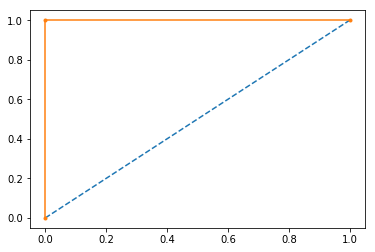

In [0]:
from sklearn.metrics import roc_curve, roc_auc_score

probs = GBR.predict_proba(X_train)
probs = probs[:, 1]
auc = roc_auc_score(y, probs)
print('AUC: %.3f' % auc)

fpr, tpr, thresholds = roc_curve(y, y_pred_train)
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.show()

In [0]:
from sklearn.metrics import classification_report
y_pred_train = GBR.predict(X_train)
print(classification_report(y, y_pred_train))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       299
         1.0       1.00      1.00      1.00       744

    accuracy                           1.00      1043
   macro avg       1.00      1.00      1.00      1043
weighted avg       1.00      1.00      1.00      1043



## Model Prediction

In [0]:
y_pred_test = GBR.predict(X_test)
prob = GBR.predict_proba(X_test)
prob = prob[:, 1]

In [0]:
df= pd.DataFrame({'isolate':isolates, 'Predicted_Categorical_Clearance':y_pred_test, 'Probability':prob})
df = df.groupby('isolate').agg('max')
df['Predicted_Categorical_Clearance'] = df['Predicted_Categorical_Clearance'].map({1.0:'Fast', 0.0:'Slow'})
df

,Predicted_Categorical_Clearance,Probability
isolate,,
isolate_02,Fast,0.995249
isolate_09,Fast,0.988606
isolate_10,Fast,0.993823
isolate_11,Fast,0.965870
isolate_12,Fast,0.986916
isolate_13,Fast,0.987315
isolate_14,Fast,0.989584
isolate_16,Fast,0.985027
isolate_18,Fast,0.975462
